<a href="https://colab.research.google.com/github/gabrielgranados97/Tareas-IA/blob/main/Tarea3_Punto5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gabriel Fernando Granados Álvarez**

*   Tópicos IA
*   Lenguaje Natural

**Universidad Nacional de Colombia**

Tarea n°3

In [1]:
#Punto 5
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np

#from torch.nn import Flatten, Sequential, Linear, ReLU

In [2]:
# Baja los datos de entrenamiento de open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Baja los datos test data de open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



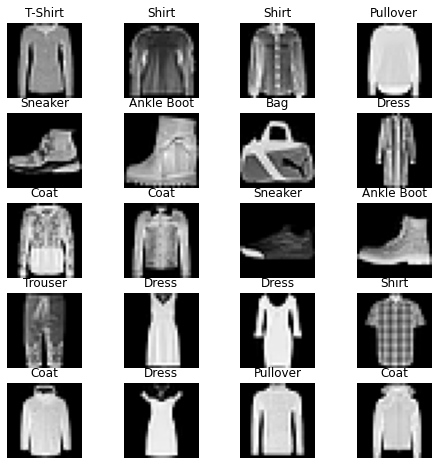

In [3]:
#Datos
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(training_data));
    img = training_data[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[training_data[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [4]:
batch_size = 32

#crea data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print('X[N, C, H, W]: ', X.shape)
    print('Shape of y: ', y.shape, y.dtype)
    break

X[N, C, H, W]:  torch.Size([32, 1, 28, 28])
Shape of y:  torch.Size([32]) torch.int64


In [5]:
#Ejemplo clases e intancias
#Clase
class NeuralNetwork:
    pass

#2 instancias de la clase
modelo_1 = NeuralNetwork()
modelo_2 = NeuralNetwork()
print(modelo_1)

In [6]:
#Herencia
#Derivar una clase de otra
class NeuralNetwork(nn.Module):
    pass

In [7]:
#Crear una Red Neuronal (RN)
import torch
from torch import nn
from torch.nn import Flatten, Sequential, Linear, ReLU

# define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        #llama al cosntructor de la clase base
        super(NeuralNetwork, self).__init__()
        # define las capas que usará en la construcción del modelo
        self.flatten = Flatten()
        self.linear_relu_stack = Sequential(
            Linear(28*28, 512),
            ReLU(),
            Linear(512, 512),
            ReLU(),
            Linear(512, 10),
            ReLU()
        )
        
    # El método forward es la que define la estructura de la red
    # en este ejemplo aceptamos solo una entrada, pero si lo desea,
    # siéntase libre de usar más
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# instancia un objeto
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [8]:
#Entrenamiento de una RN
#Clase NeuralNetwork
from torch import nn
from torch.nn import Flatten, Sequential, Linear, ReLU

class NeuralNetwork(nn.Module):
    def __init__(self):
        
        # llama constructor de la clase base
        super(NeuralNetwork, self).__init__()
        
        # define capas de la red
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

print(NeuralNetwork())

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [9]:
#Clase Trainer
from datetime import datetime
from torch.nn.functional import softmax

class Trainer:
    def __init__(self, model, loss_fn, optimizer, metrics=None,
                 metric_names=None,
                 writer=None, path_to_save='',
                 learning_rate = 1e-3,
                 batch_size = 64,
                 epochs = 5, n_report= 1000):
        #################################
        # propiedades de la clase Trainer
        #################################
        # red neuronal
        self.model = model
        # función de pérdida
        self.loss_fn = loss_fn
        # optimizador
        self.optimizer = optimizer
        # métricas
        self.metrics_train = metrics
        self.metrics_valid = self.metrics_train.copy()
        self.metric_names = metric_names
        
        # writer de tensorboard 
        self.writer = writer
        
        # hiperparámetros
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.n_report = n_report
        
        # path para almacenar los modelos
        self.path_to_save = path_to_save
        # path al mejor modelo encontrado
        self.best_model = None
        
        # datos: se cargan desde la función fit
        # datos de entrenamiento
        self.training_loader = None
        # datos de validación
        self.validation_loader = None
     
    ##############################
    #  Métodos de la clase Trainer
    ##############################
    # setters              
    def set_model(self, model):
        self.model = model
    
    def set_loss(self, loss):
        self.loss = loss
        
    def set_optimizer(self, optimizer):
        self.optimizer = optimizer
        
    def set_writer(self, writer):
        self.writer =  writer
    # getters
    def get_model(self):
        return self.model
    
    
    def set_hiperparameters(self,
                 learning_rate = 1e-3,
                 batch_size = 64,
                 epochs = 5):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs        
    
    #####################################
    # métodos básicos para entrenamiento
    #####################################
    # paso de entrenamiento
    def _train_one_epoch_(self, epoch_index):
        """
        corre un paso de entrenamiento
        :params
        :epoch_index: índice de la época
        :n_report: cada cuantas iteraciones reportar en pantalla
        """
        running_loss = 0.
        last_loss = 0.
        # Aquí, usamos enumerate(training_loader) en lugar de
        # iter(training_loader) para que podamos rastrear el lote
        # indexar y hacer algunos informes dentro de la época
        for i, data in enumerate(self.training_loader):
            # Cada instancia de datos contiene parejas  input + label 
            inputs, labels = data

            # backpropagation
            # por defecto el cálculo del gradiente es acumulativo
            # comienza colocando el gradiente en cero
            self.optimizer.zero_grad()

            # Hace la predicción para este lote (batch)
            outputs = self.model(inputs)
            predicts = softmax(outputs, dim=-1)

            # Calcula la pérdida y sus gradientes
            loss = self.loss_fn(outputs, labels)
            loss.backward()

            # Ajusta los pesos del modelo 
            # w{i+1} = w{i} + learning_rate * grad(loss)
            self.optimizer.step()

            # Recolecta  datos y los reporta
            # pérdida
            running_loss += loss.item()
            # metricas
            running_metrics = self._metric_step_(predicts, labels, metric_compute=False, 
                                          validation=False)
            
            if i % self.n_report == (self.n_report-1):
                # pérdida
                last_loss = running_loss / self.n_report # pérdida promedio por lote(batch)
                running_loss = 0.
                # métricas
                last_metrics = self._metric_step_(None, None, metric_compute=True, 
                                          validation=False)
                
                # imprime pérdida del lote
                print('Pérdida en el lote {} : {}'.format(i + 1, last_loss))
                
                # imprime métricas del lote
                print_m = ''
                for j in range(len(metrics)):
                    print_m += self.metric_names[j] + ': ' + str(last_metrics[j]) + ' '
                print('Métricas en el lote {} : {}'.format(i + 1, print_m))
                
                # escribe en el writer
                if self.writer is not None:
                    tb_x = epoch_index * len(training_loader) + i + 1
                    # pérdida
                    self.writer.add_scalar('Pérdida/Entrenamiento', last_loss, tb_x)
                    # métricas
                    for i in range(len(last_metric)):
                        self.writer.add_scalar(self.metric.names[i] + '/Entrenamiento', 
                                               last_metrics[i], tb_x)
                        
                
                
    def _validation_step_(self, validation=True):
        """
        corre un paso de validación
        :params: validation=True; toma los datos de validación
        :        sino toda los datos de entrenamiento
        """
        
        if validation:
            data_loader = self.validation_loader
        else:
            data_loader = self.training_loader
        
        # Pérdida
        running_vloss = 0.0   
        for i, vdata in enumerate(data_loader):
            vinputs, vlabels = vdata
            voutputs = self.model(vinputs)
            vpredicts = softmax(voutputs,dim=-1)
            vloss = self.loss_fn(voutputs, vlabels)
            
            running_vloss += vloss
            _  = self._metric_step_(vpredicts, vlabels, 
                            metric_compute=False, validation= validation)

        avg_vloss = running_vloss / (i + 1)
        v_metrics =   self._metric_step_(None, None, metric_compute=True, 
                                          validation= validation)
        
        return avg_vloss, v_metrics
        
    def _metric_step_(self, predicts, labels, metric_compute=False, validation=False):
        """
        actualiza y calcula las métricas
        """            
                
        if validation:
            metrics = self.metrics_valid
        else:
            metrics = self.metrics_train
        
        if predicts is not None and labels is not None:
            for i, metric in enumerate(metrics):
                metrics[i].update(predicts, labels)
        
        if metric_compute:
            values = [metric.compute().item() for metric in metrics]
            for metric in metrics:
                metric.reset() 
        else:
            values = [metric(predicts, labels).item() for metric in metrics]
    
        return values
      
    
    # ciclo de entrenamiento
    def _train_loop_(self):
        # registra marca  de tiempo
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        # contador de epochs
        epoch_number = 0

        # Inicializa la mejor pérdida en un valor muy grande
        # el propósito es mejorar esta mejor pérdida
        best_vloss = 1_000_000.
        
         
        # ciclo de entrenamiento
        for epoch in range(self.epochs):
            print('época {}:'.format(epoch_number + 1))
            
            # paso de entrenamiento
            # coloca en modelo en modo entrenamiento 
            model.train(True)
            # lanza un paso de entrenamiento
            self._train_one_epoch_(epoch_number)

            # paso de validación 
            # coloca el modelo en modo inferencia
            self.model.train(False)
            
            # lanza un paso de validación
            e_loss, e_metrics = self._validation_step_(validation=False)
            v_loss, v_metrics = self._validation_step_(validation=True)
            
            # imprime pérdida dela época
            print('Pérdida entrenamiento: {}, validación {}'.format(e_loss, v_loss))
            
            # imprime métricas del lote la época
            print_m_e = ''
            for i in range(len(e_metrics)):
                print_m_e += self.metric_names[i] + ': ' + str(e_metrics[i]) + ' '
            print_m_v = ''
            for i in range(len(v_metrics)):
                print_m_v += self.metric_names[i] + ': ' + str(v_metrics[i]) + ' '     
            print('Métricas en entrenamiento : {}, validación {} '.format(print_m_e, print_m_v))

            # Registra (log) la pérdida actual promedio  por lote (batch)
            # para entrenamiento y validación
            if self.writer is not None:
                # pérdida
                self.writer.add_scalars('Pérdida entrenamiento v.s. Pérdida validación',
                                { 'Entrenamiento' : e_loss, 'Validación' : e_vloss },
                                epoch_number + 1)
                
                # métricas
                for i in range(len(e_metrics)):  
                    self.writer.add_scalars(self.metric.names[i] + 'entrenamiento v.s. validación',
                                { 'Entrenamiento' : e_metrics[i], 'Validación' : v_metrics[i] },
                                epoch_number + 1)
                  
                self.writer.flush()

            # Realice un seguimiento del mejor rendimiento y guarda el estado del modelo
            if  v_loss < best_vloss:
                best_vloss = v_loss
                model_path = self.path_to_save + 'model_{}_{}'.format(timestamp, epoch_number)
                torch.save(model.state_dict(), model_path)
                self.path_best_model = model_path

            epoch_number += 1 
        """
        calculo final de pérdida y métric no se requiere
        """
       
                    
            
    def fit(self, train_data, val_data, epochs=None, writer=None, best_loss=True):
        if writer is not None:
            self.writer = writer
        if epochs is not None:
            self.epochs = epochs
       # datos de entrenamiento
        self.training_loader = train_data
        # datos de validación
        self.validation_loader = val_data
        
        # lanza loop de entrenamiento
        self._train_loop_()
        # carga al modelo los pesos con mejor pérdida
        if best_loss:
            self.model.load_state_dict(torch.load(self.path_best_model))

In [10]:
#Clase Data
from torch.utils.data import DataLoader

class Data():
    """
    Esta clase recibe un dataset, y lo envuelve en un dataloader
    
    :
    se definen getter y setter para la propiedad data
    """
    def __init__(self, dataset=None, batch_size=64, shuffle=True):
        """
        :params: dataset: opcional dataset incial inicial
        :batch_size: tamaño de los lotes de datos para el Dataloader
        :shuffle: True= mezclar los datos aleatoriamente (para entranamiento)
        """     
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self._data = DataLoader(dataset, batch_size=self.batch_size, shuffle=self.shuffle)
    
    # getter
    def get_data(self):
        return self._data
    
    # setter
    def set_data(self, dataset):
        self._dataset = dataset
        self._data = DataLoader(self._dataset, batch_size=self.batch_size, shuffle=self.shuffle)
    
    # crea la propiedad data
    data = property(get_data, set_data)
    
    def __len__(self):
        return len(self._data)

In [11]:
#Clase Drawer
import matplotlib.pyplot as plt
import numpy as np

class Drawer:
    """
    Clase utilitaria para deplegar imágenes en línea
    asumimos que los datos no están listos para ser desplegados
    Por ejemplo si tiene los datos normalizados revierta el proceso
    
    """    
    def __init__(self, dataset, label_names, rows=5, columns=4, figsize=(8,8)):
        
        """
        :params
        : data_set: dtaset de datos
        : label_names: nombres asociados a las  la etiquetas de los datos
        : rows: número de filas e¿del gráfico
        : columns: núemro de columnas del gráfico
        """
        self.dataset = dataset
        self.label_names = label_names
        self.rows = rows
        self.columns = columns
        self.figsize = figsize
    
    def plot(self):
        fig = plt.figure(figsize=self.figsize);
        
        for i in range(1, self.columns * self.rows +1):
            img_xy = np.random.randint(len(self.dataset));
            img = self.dataset[img_xy][0][0,:,:]
            fig.add_subplot(self.rows, self.columns, i)
            plt.title(labels_map[self.dataset[img_xy][1]])
            plt.axis('off')
            plt.imshow(img, cmap='gray')
        plt.show()

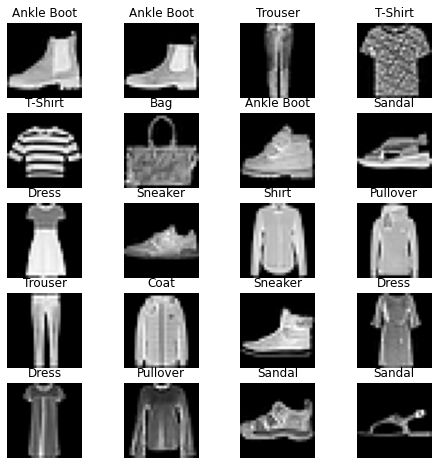

In [12]:
#Mirada a las imagenes
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

drawer = Drawer(dataset=test_data, label_names=labels_map)
drawer.plot()

In [20]:
pip install torchmetrics

     |████████████████████████████████| 408 kB 5.4 MB/s 


In [23]:
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor, Lambda, Compose
from torch import nn
from torch.nn import Flatten, Sequential, Linear, ReLU


import matplotlib.pyplot as plt
import numpy as np

from torch.utils.tensorboard import SummaryWriter

from datetime import datetime
#from torchmetrics.classification import Accuracy
from torchmetrics import Accuracy

# Prepara los datos
## Transformaciones para los datos

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

# Sube los datos a objetos Data, que son
# contenedores del dataset y DataLoader

train = Data(train_data, batch_size=32)
validation = Data(test_data, batch_size=32, shuffle=False)

# Crea el modelo
# Obtiene gpu o cpu device para el entrenamiento
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('using {} device'.format(device))

model = NeuralNetwork().to(device)

# Optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Función de pérdida
loss_fn = torch.nn.CrossEntropyLoss()

# initializa métrica
# se espera una lista de métricas
metrics = [Accuracy()] # accuracy
# pasar nombre en español de la métrica
# TODO hacer esto con una clase traductora
metric_names = ['Exactitud']
# path para almacenar los pesos de los mejores modelos
path_to_save = '../Modelos/'

# Trainer
trainer = Trainer(model=model, loss_fn=loss_fn,  
                  optimizer=optimizer, metrics=metrics, 
                  metric_names = metric_names,
                  n_report=375, path_to_save= path_to_save )

using cpu device


In [25]:
#Entrenamiento
trainer.fit(train.data, validation.data)

época 1:
Pérdida en el lote 375 : 0.7746274717648824
Métricas en el lote 375 : Exactitud: 0.734666645526886 
Pérdida en el lote 750 : 0.7919481502374013
Métricas en el lote 750 : Exactitud: 0.7307500243186951 
Pérdida en el lote 1125 : 0.7733503754138946
Métricas en el lote 1125 : Exactitud: 0.7394166588783264 
Pérdida en el lote 1500 : 0.7683087160587311
Métricas en el lote 1500 : Exactitud: 0.737416684627533 
Pérdida en el lote 1875 : 0.7658536503314972
Métricas en el lote 1875 : Exactitud: 0.7394999861717224 
Pérdida entrenamiento: 0.7393919229507446, validación 0.7910322546958923
Métricas en entrenamiento : Exactitud: 0.7450500130653381 , validación Exactitud: 0.7330999970436096  


FileNotFoundError: ignored